<a href="https://colab.research.google.com/github/mohadesehsotoudehnia/FIS-projects/blob/main/MiniProject1%20/%20FIS4041_MP1_Q5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Q5***

# **Download with gdown**

In [19]:
!pip -q install gdown

!gdown --id 180-WW-ofJNWOHxC9_sWpTCHZ4Q53r2CU -O Housing.csv

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=180-WW-ofJNWOHxC9_sWpTCHZ4Q53r2CU
To: /content/Housing.csv
100% 30.0k/30.0k [00:00<00:00, 43.9MB/s]


# **Load & Preview**

In [20]:
import pandas as pd

df = pd.read_csv("Housing.csv")

print("First 5 rows:")
display(df.head(5))

First 5 rows:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# **Feature Type Identification**

In [21]:
import pandas as pd

df = pd.read_csv("Housing.csv")

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()


print("Numeric features :")
print(numeric_features)
print("\nTotal numeric features:", len(numeric_features))

print("\nCategorical features :")
print(categorical_features)
print("\nTotal categorical features:", len(categorical_features))

Numeric features :
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

Total numeric features: 6

Categorical features :
['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

Total categorical features: 7


# **Visualize Multiple Categorical Feature**

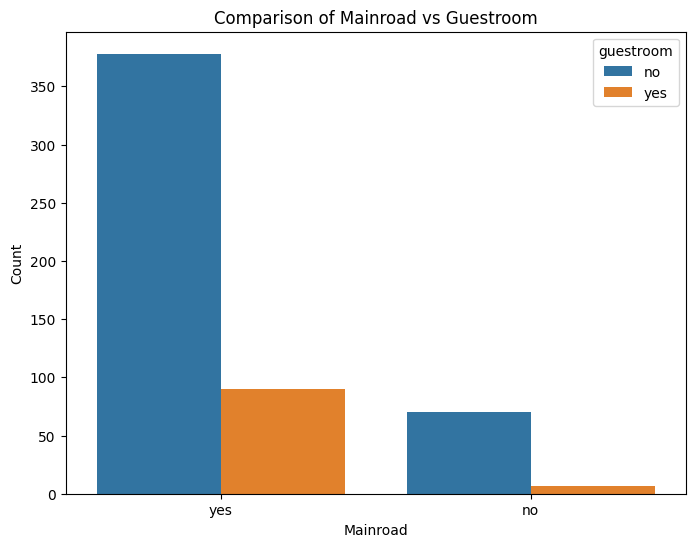

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

sns.countplot(x='mainroad', hue='guestroom', data=df)

plt.title('Comparison of Mainroad vs Guestroom')
plt.xlabel('Mainroad')
plt.ylabel('Count')

plt.show()

# **Visualize Numeric Features Distribution with Distplot**

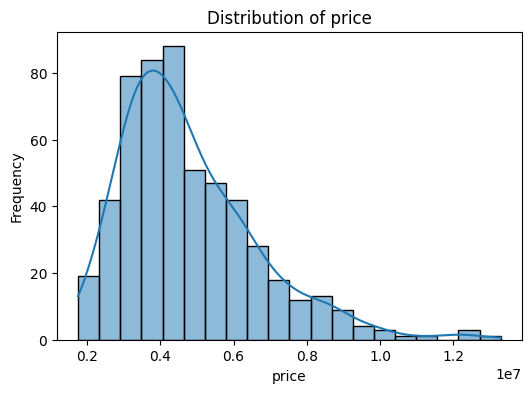

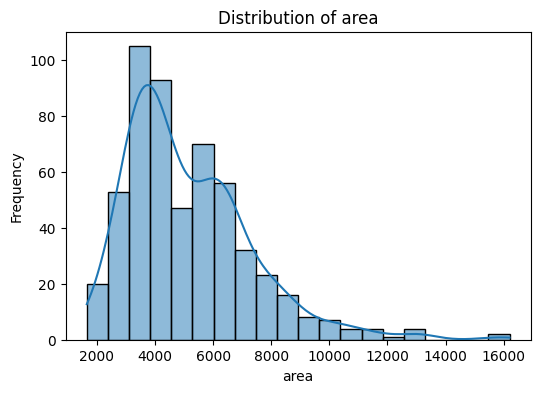

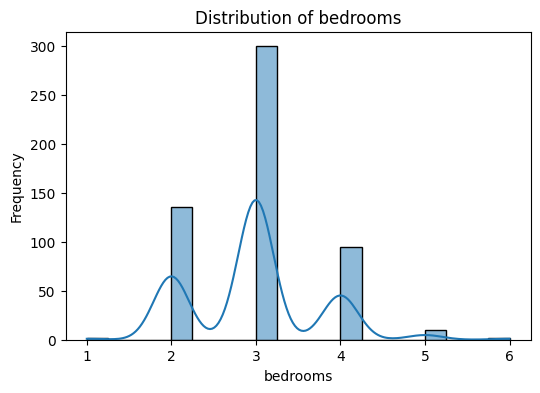

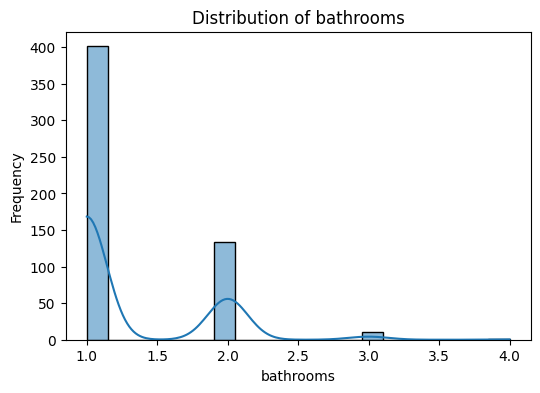

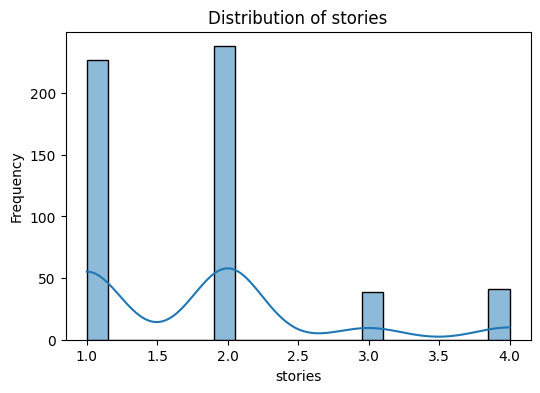

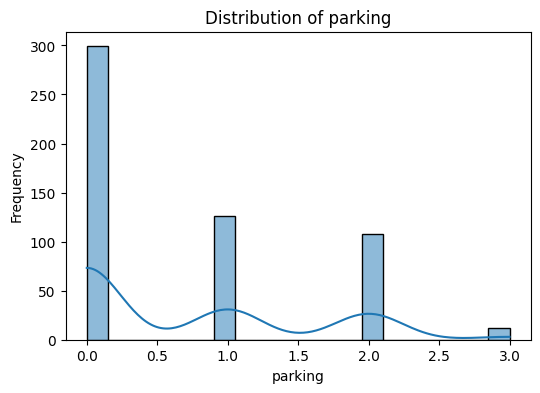

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

for feature in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# **Visualize Feature Relationships with Pairplot**

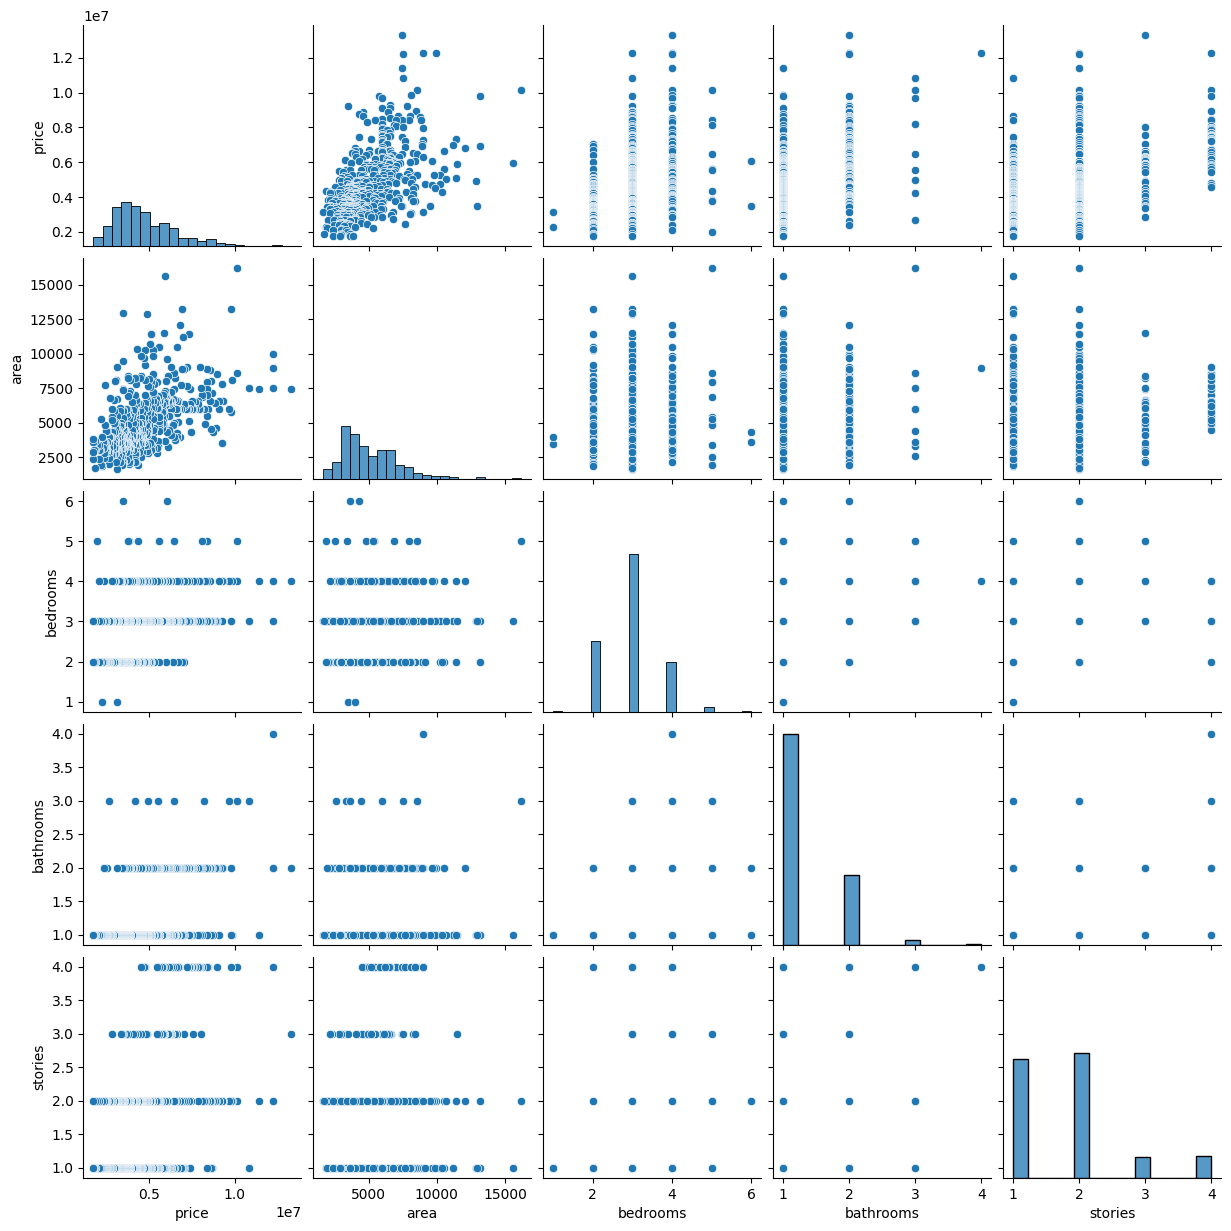

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ['price', 'area', 'bedrooms', 'bathrooms', 'stories']

sns.pairplot(df[features_to_plot])
plt.show()

# **Check and Remove Duplicate Rows**

In [25]:
duplicates = df.duplicated()

print(f"Number of duplicate rows: {duplicates.sum()}")

df_cleaned = df.drop_duplicates()

print(f"New dataset shape (after removing duplicates): {df_cleaned.shape}")

Number of duplicate rows: 0
New dataset shape (after removing duplicates): (545, 13)


# **Check and Handle Missing Values**

In [26]:
missing_values = df.isnull().sum()

print("Missing Values per Feature:")
print(missing_values[missing_values > 0])

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

missing_values_after = df.isnull().sum()
print("\nMissing Values After Handling:")
print(missing_values_after[missing_values_after > 0])


Missing Values per Feature:
Series([], dtype: int64)

Missing Values After Handling:
Series([], dtype: int64)


# **Check the files in the current directory**

In [27]:
!ls

Housing.csv  sample_data


# **One-Hot Encoding and Ordinal Encoding**

In [28]:
df = pd.read_csv('/content/Housing.csv')

print(df.columns)

df_encoded = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'])

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['unfurnished', 'semi-furnished', 'furnished']])
df_encoded['furnishingstatus'] = ordinal_encoder.fit_transform(df[['furnishingstatus']])

df_encoded.head()

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,2.0,False,True,True,False,True,False,True,False,False,True,False,True
1,12250000,8960,4,4,4,3,2.0,False,True,True,False,True,False,True,False,False,True,True,False
2,12250000,9960,3,2,2,2,1.0,False,True,True,False,False,True,True,False,True,False,False,True
3,12215000,7500,4,2,2,3,2.0,False,True,True,False,False,True,True,False,False,True,False,True
4,11410000,7420,4,1,2,2,2.0,False,True,False,True,False,True,True,False,False,True,True,False


# **Outlier Removal**

In [29]:
import pandas as pd

df = pd.read_csv('/content/Housing.csv')

print(df.dtypes)

df = df.apply(pd.to_numeric, errors='coerce')

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

df_cleaned = df[~outliers.any(axis=1)]

print("📊 ابعاد اولیه دیتاست:", df.shape)
print("📉 ابعاد پس از حذف داده‌های پرت:", df_cleaned.shape)

df_cleaned.head()

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object
📊 ابعاد اولیه دیتاست: (545, 13)
📉 ابعاد پس از حذف داده‌های پرت: (463, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
16,9100000,6600,4,2,2,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
18,8890000,4600,3,2,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
19,8855000,6420,3,2,2,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
20,8750000,4320,3,1,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN


# **Train-Test Split**

In [30]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/Housing.csv')

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("ابعاد داده‌های آموزش (X_train, y_train):", X_train.shape, y_train.shape)
print("ابعاد داده‌های آزمون (X_test, y_test):", X_test.shape, y_test.shape)

ابعاد داده‌های آموزش (X_train, y_train): (436, 12) (436,)
ابعاد داده‌های آزمون (X_test, y_test): (109, 12) (109,)


# **Data Normalization**

In [31]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('/content/Housing.csv')

numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,yes,no,no,no,yes,0.666667,yes,furnished
1,0.909091,0.502405,0.6,1.000000,1.000000,yes,no,no,no,yes,1.000000,no,furnished
2,0.909091,0.571134,0.4,0.333333,0.333333,yes,no,yes,no,no,0.666667,yes,semi-furnished
3,0.906061,0.402062,0.6,0.333333,0.333333,yes,no,yes,no,yes,1.000000,yes,furnished
4,0.836364,0.396564,0.6,0.000000,0.333333,yes,yes,yes,no,yes,0.666667,no,furnished


# **Feature Correlation Matrix**

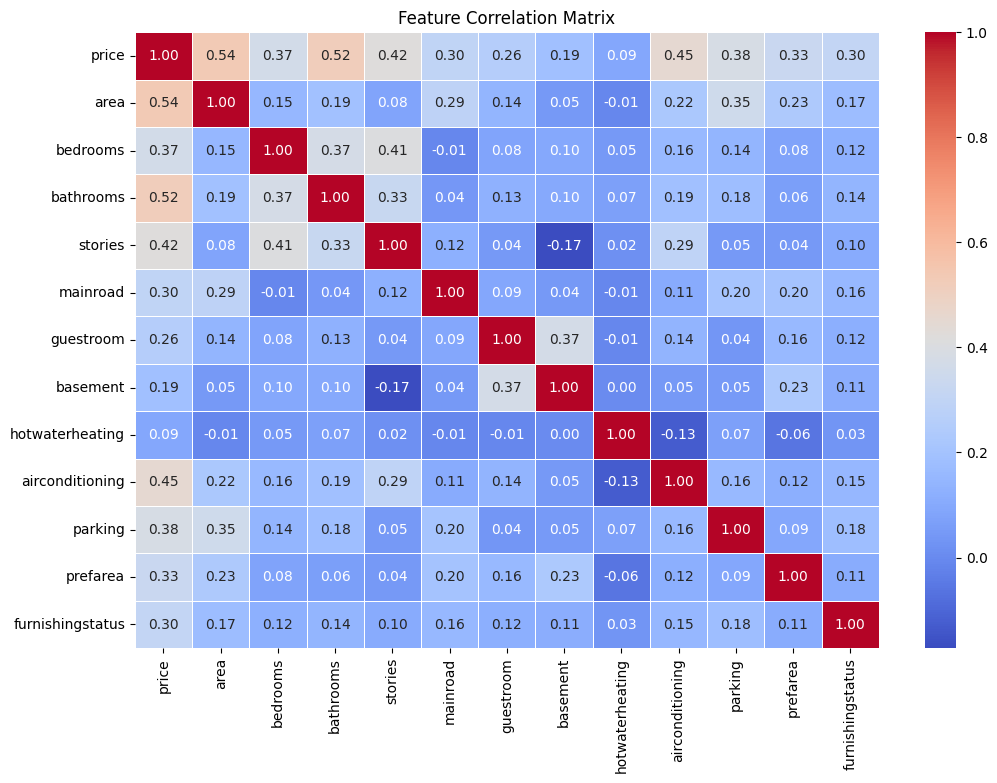

price            area               0.535997
area             price              0.535997
bathrooms        price              0.517545
price            bathrooms          0.517545
                 airconditioning    0.452954
                                      ...   
prefarea         hotwaterheating   -0.059411
airconditioning  hotwaterheating   -0.130023
hotwaterheating  airconditioning   -0.130023
basement         stories           -0.172394
stories          basement          -0.172394
Length: 156, dtype: float64

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Housing.csv')

df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

correlation_matrix_unstacked = correlation_matrix.unstack().sort_values(ascending=False)
correlation_matrix_unstacked[correlation_matrix_unstacked < 1]


# **Feature Selection using PCA**

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/Housing.csv')

X = df.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Number of principal components selected: {X_pca.shape[1]}")

explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio by each component: {explained_variance}")
print(f"Total explained variance: {sum(explained_variance)}")

Number of principal components selected: 6
Explained variance ratio by each component: [0.42601752 0.20285811 0.11285691 0.10944497 0.09847324 0.05034924]
Total explained variance: 1.0


# **Feature Selection Using VIF and RFE**

# **Multiple Linear Regression**

In [ ]:
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('/content/Housing.csv')
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared (R^2): {r2}")

Root Mean Squared Error (RMSE): 1331071.4167895108
R-Squared (R^2): 0.6494754192267803


# **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Root Mean Squared Error (RMSE) for Ridge Regression: {rmse_ridge}")
print(f"R-Squared (R^2) for Ridge Regression: {r2_ridge}")

Root Mean Squared Error (RMSE) for Ridge Regression: 1332000.7201472826
R-Squared (R^2) for Ridge Regression: 0.6489858025515296


# **Lasso Regression**

In [ ]:
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('/content/Housing.csv')
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})
X = df.drop(columns=['price'])
y = df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Root Mean Squared Error (RMSE) for Lasso Regression: {rmse_lasso}")
print(f"R-Squared (R^2) for Lasso Regression: {r2_lasso}")

Root Mean Squared Error (RMSE) for Lasso Regression: 1331071.5508728551
R-Squared (R^2) for Lasso Regression: 0.6494753486077138


# **Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_train)

poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

X_test_poly = poly.transform(X_test)
y_pred_poly = poly_model.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

r2_poly = r2_score(y_test, y_pred_poly)

print(f"Root Mean Squared Error (RMSE) for Polynomial Regression: {rmse_poly}")
print(f"R-Squared (R^2) for Polynomial Regression: {r2_poly}")

Root Mean Squared Error (RMSE) for Polynomial Regression: 1983204.971893656
R-Squared (R^2) for Polynomial Regression: 0.22187213376323922


# **Multi-Layer Perceptron (MLP)**

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)

mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)

rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))

r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"Root Mean Squared Error (RMSE) for MLP Regression: {rmse_mlp}")
print(f"R-Squared (R^2) for MLP Regression: {r2_mlp}")

Root Mean Squared Error (RMSE) for MLP Regression: 2021688.935056021
R-Squared (R^2) for MLP Regression: 0.19138008754126223


# **Regression Elastic-Net**

In [56]:
!pip install gdown

import gdown

file_id = '180-WW-ofJNWOHxC9_sWpTCHZ4Q53r2CU'
url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, 'Housing.csv', quiet=False)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Housing.csv')

print(data.info())
print(data.head())

X = data.drop('price', axis=1)
y = data['price']

le = LabelEncoder()

categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

print(data.dtypes)

X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_model.fit(X_train_scaled, y_train)

y_pred_elastic_net = elastic_net_model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_elastic_net))
r2 = r2_score(y_test, y_pred_elastic_net)

print(f"Elastic Net - RMSE: {rmse}, R²: {r2}")

Downloading...
From: https://drive.google.com/uc?id=180-WW-ofJNWOHxC9_sWpTCHZ4Q53r2CU
To: /content/Housing.csv
100%|██████████| 30.0k/30.0k [00:00<00:00, 50.7MB/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no    

# **Feature Extraction from Hidden Layer (MLP)**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/Housing.csv')

df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 1, 'semi-furnished': 0.5, 'unfurnished': 0})

X = df.drop(columns=['price'])
y = df['price']

y = pd.cut(y, bins=4, labels=[0, 1, 2, 3])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp_model = MLPClassifier(hidden_layer_sizes=(300, 200, 100), max_iter=10000, solver='adam', random_state=43)
mlp_model.fit(X_train_scaled, y_train)

hidden_layer_output_train = mlp_model.predict_proba(X_train_scaled)
hidden_layer_output_test = mlp_model.predict_proba(X_test_scaled)

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(hidden_layer_output_train, y_train)

y_pred_lasso = lasso_model.predict(hidden_layer_output_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression with MLP Features - RMSE: {rmse_lasso}, R^2: {r2_lasso}")

Lasso Regression with MLP Features - RMSE: 0.5621591464978232, R^2: 0.23217420325542248
